# Zefir 2021

### Aggregated data from Zefir Telegram chat

Photos from the chat were downloaded and marked with tags using DeepDanbooru neural net. You can explore the data in this notebook

In [1]:
import json

import matplotlib.pyplot as plt

from collections import OrderedDict

Matplotlib is building the font cache; this may take a moment.


## Data Preparation

In [2]:
json_file = 'tag_data.json'

In [3]:
with open(json_file, 'r') as f:
    photos_data = json.load(f)

In [4]:
tag_lengths = []

In [5]:
for tag, photos in photos_data['tag_to_id'].items():
    tag_lengths.append((len(photos), tag))

In [6]:
tag_lengths = sorted(tag_lengths)[::-1]

In [7]:
lengths = OrderedDict()
for length, tag in tag_lengths:
    lengths[tag] = length

## Tags Overview and Comparison

### Top 20 popular tags

In [37]:
n = 25

In [38]:
top_n = tag_lengths[:n]

In [39]:
top_n_tags, top_n_posts = [], []

for posts, tag in top_n:
    top_n_tags.append(tag)
    top_n_posts.append(posts)

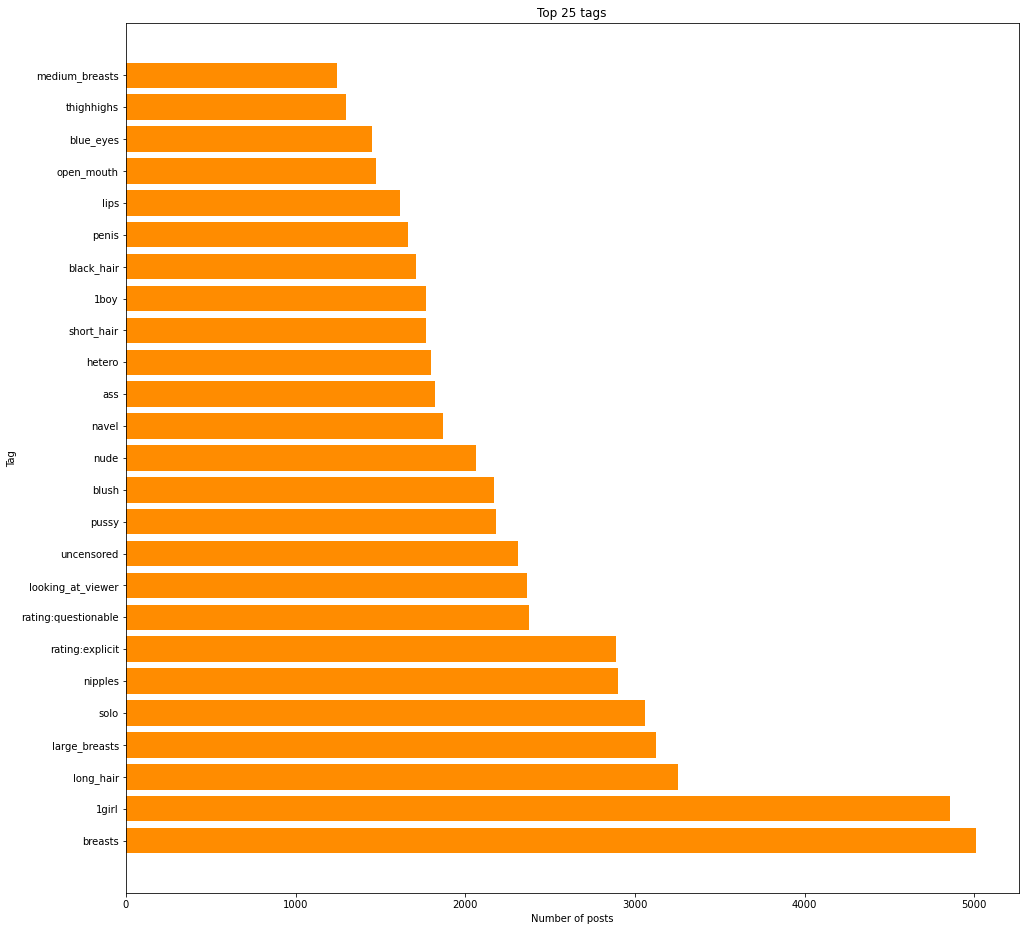

In [42]:
plt.figure(figsize=(16, 16))
plt.barh(top_n_tags, top_n_posts, color='darkorange')
plt.title(f'Top {n} tags')
plt.xlabel('Number of posts')
plt.ylabel('Tag')
plt.show()

### Number of girls vs. Number of boys

In [43]:
n_girls_tags = ['1girl', '2girls', '3girls', '4girls', '5girls', '6+girls']
n_girls_posts = []

In [44]:
for n_girls_tag in n_girls_tags:
    n_girls_posts.append(lengths[n_girls_tag])

In [45]:
n_boys_tags = ['1boy', '2boys', '3boys', '4boys', '5boys', '6+boys']
n_boys_posts = []

In [46]:
for n_boys_tag in n_boys_tags:
    n_boys_posts.append(lengths[n_boys_tag])

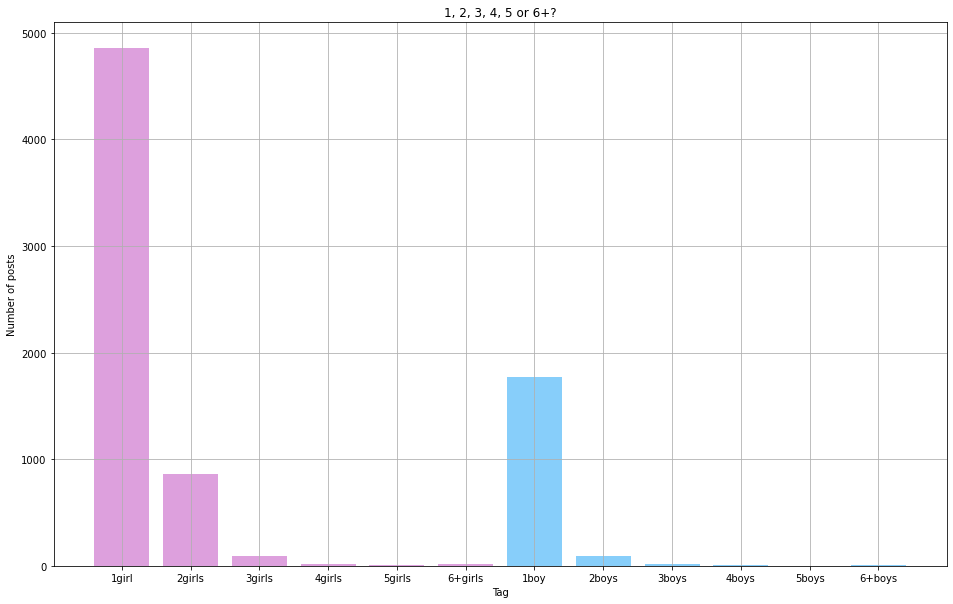

In [47]:
plt.figure(figsize=(16, 10))
plt.bar(n_girls_tags, n_girls_posts, color='plum')
plt.bar(n_boys_tags, n_boys_posts, color='lightskyblue')
plt.grid()
plt.title('1, 2, 3, 4, 5 or 6+?')
plt.xlabel('Tag')
plt.ylabel('Number of posts')

#plt.yscale('log')
plt.show()

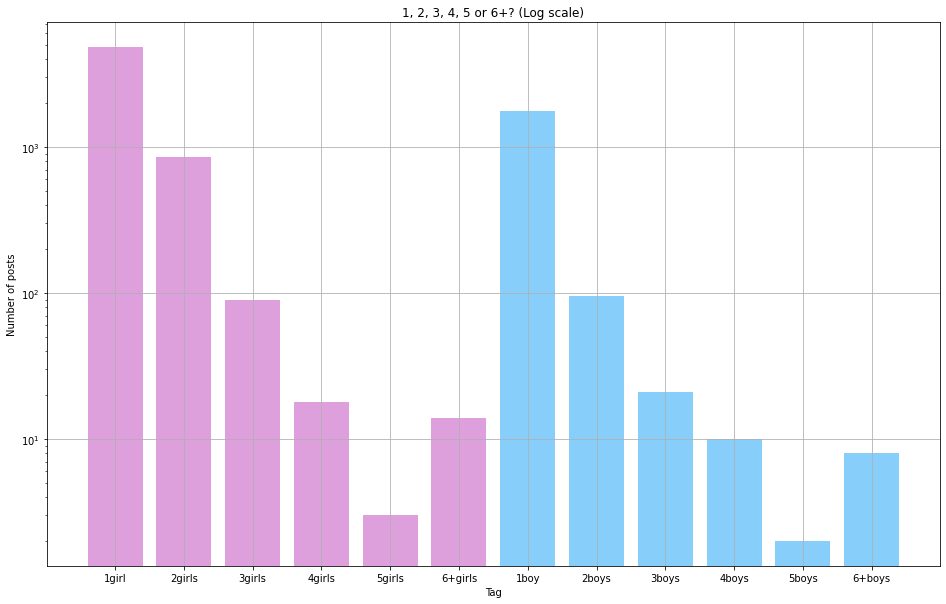

In [48]:
plt.figure(figsize=(16, 10))
plt.bar(n_girls_tags, n_girls_posts, color='plum')
plt.bar(n_boys_tags, n_boys_posts, color='lightskyblue')
plt.grid()
plt.title('1, 2, 3, 4, 5 or 6+? (Log scale)')
plt.xlabel('Tag')
plt.ylabel('Number of posts')

plt.yscale('log')
plt.show()

### Tits vs Ass

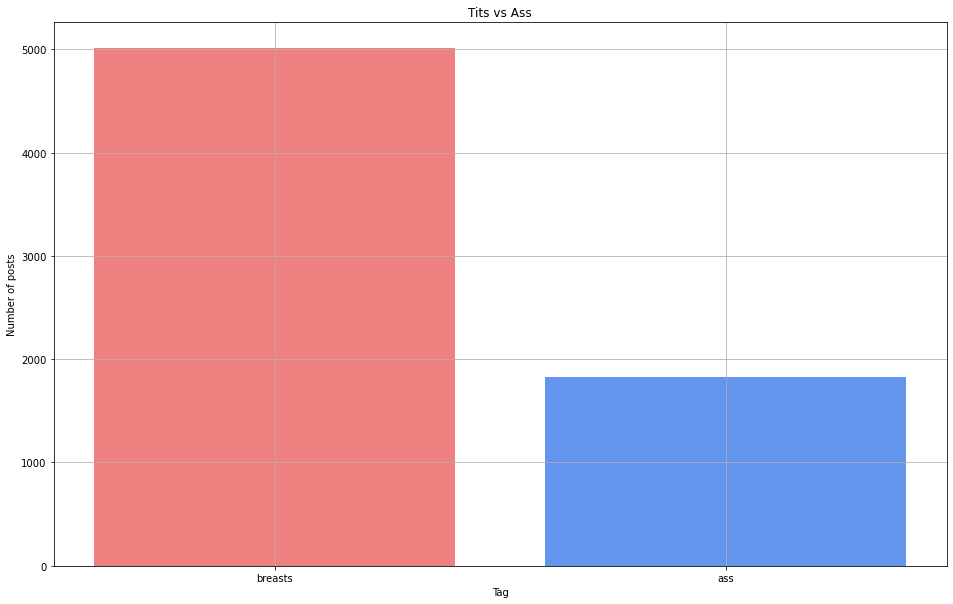

In [50]:
plt.figure(figsize=(16, 10))
plt.bar('breasts', lengths['breasts'], color='lightcoral')
plt.bar('ass', lengths['ass'], color='cornflowerblue')
plt.grid()
plt.title('Tits vs Ass')
plt.xlabel('Tag')
plt.ylabel('Number of posts')
plt.show()

In [95]:
from datetime import datetime, date
import numpy as np

In [108]:
tits_posts_id = photos_data['tag_to_id']['breasts']

In [132]:
def plot_posts_by_days(*args):
    date_start = date(2021, 3, 30)
    tags_hits = []
    for tag in args:
        tag_hits = np.zeros(365)
        posts_id = photos_data['tag_to_id'][tag]
        for post, _ in posts_id:
            dt_string = photos_data['id_to_data'][str(post)][0].split('@')[-1].split('.')[0]
            hit_date = datetime.strptime(dt_string.split('_')[0], '%d-%m-%Y').date()
            delta = hit_date - date_start
            tag_hits[delta.days] += 1
        tags_hits.append(np.cumsum(np.trim_zeros(tag_hits, trim='b')))
    plt.figure(figsize=(16,10))
    title_tags = ' vs '.join(args)
    plt.title(f'{title_tags}: posts over days')
    plt.xlabel('Days')
    plt.ylabel('Posts')
    for i in range(len(tags_hits)):
        plt.plot(tags_hits[i], label=args[i], lw=4)
    plt.legend()
    plt.grid()
    plt.show()

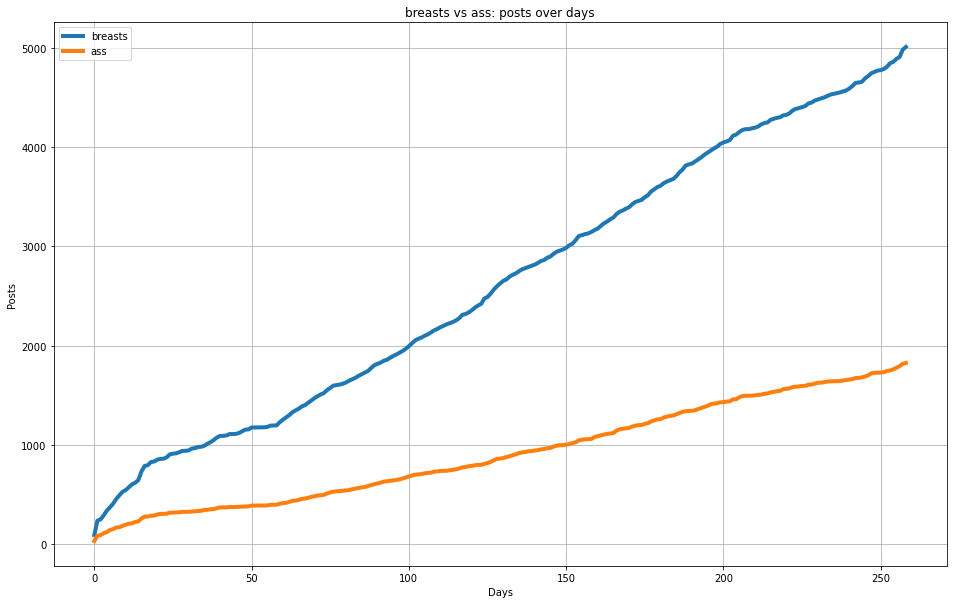

In [133]:
plot_posts_by_days('breasts', 'ass')

### Breasts sizes

In [51]:
breasts_tags = ['small_breasts',
                'medium_breasts',
                'large_breasts',
                'huge_breasts']
breasts_posts = [lengths[t] for t in breasts_tags]

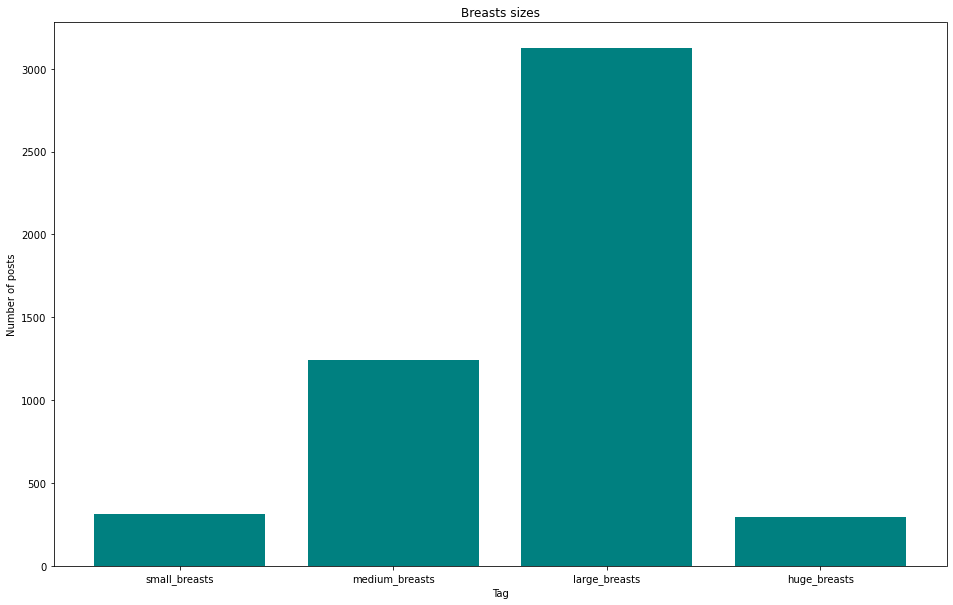

In [52]:
plt.figure(figsize=(16, 10))
plt.bar(breasts_tags, breasts_posts, color='teal')
plt.title('Breasts sizes')
plt.xlabel('Tag')
plt.ylabel('Number of posts')
plt.show()

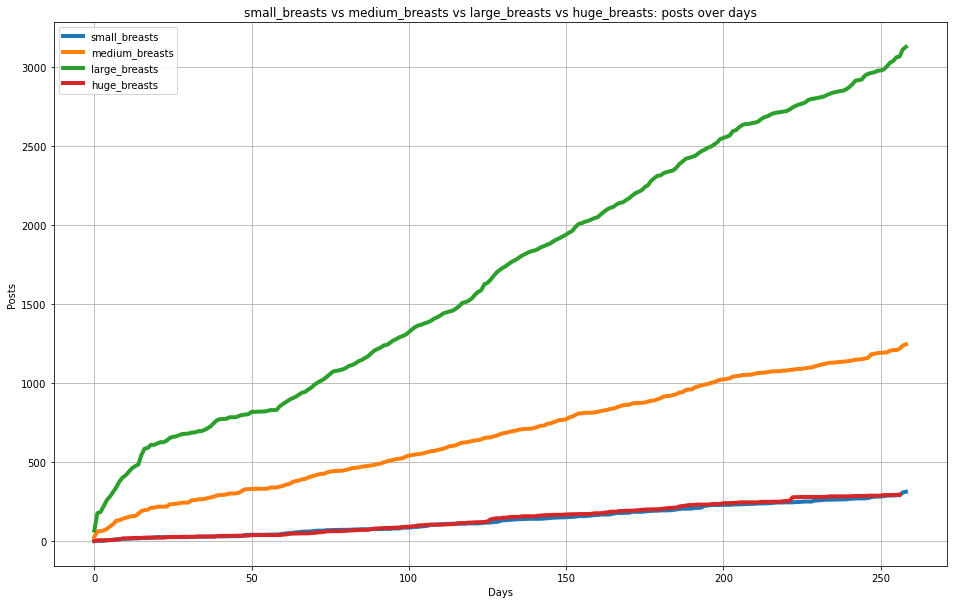

In [134]:
plot_posts_by_days(*breasts_tags)

### Futa posts

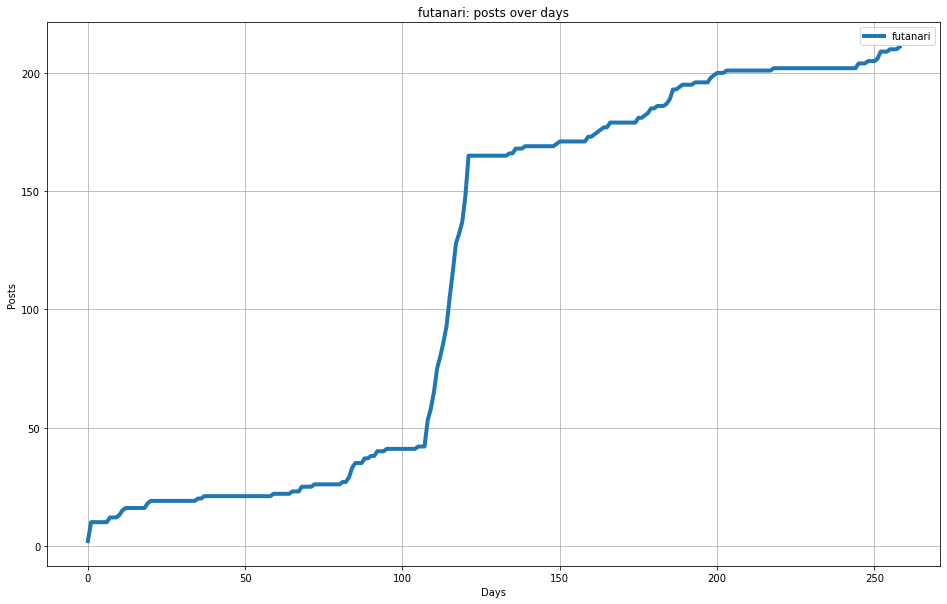

In [135]:
plot_posts_by_days('futanari')

### Colors

In [148]:
def group_by_keyword(kwd):
    return sum([lengths[i] for i in lengths.keys() if kwd in i])

In [214]:
colors = ['red',
          'black',
          'blue',
          'brown',
          'purple',
          'white',
          'green',
          'pink',
          'yellow',
          'grey',
          'silver',
          ]

colors_names = ['salmon',
                '0.7',
                'cornflowerblue',
                'sienna',
                'darkorchid',
                '0.975',
                'limegreen',
                'tab:pink',
                'khaki',
                '0.8',
                '0.9']

col_val = list(map(group_by_keyword, colors))

total = sum(col_val)

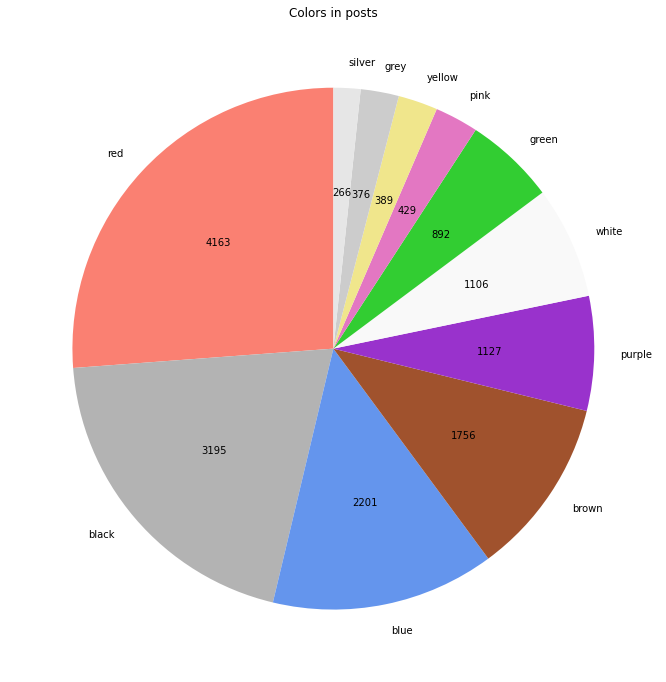

In [215]:
plt.figure(figsize=(12, 12), facecolor='white')
plt.title('Colors in posts')
plt.pie(col_val, colors=colors_names, labels=colors, startangle=90, autopct=lambda x: '{:.0f}'.format(x * total / 100))
plt.show()

### Other comparisons

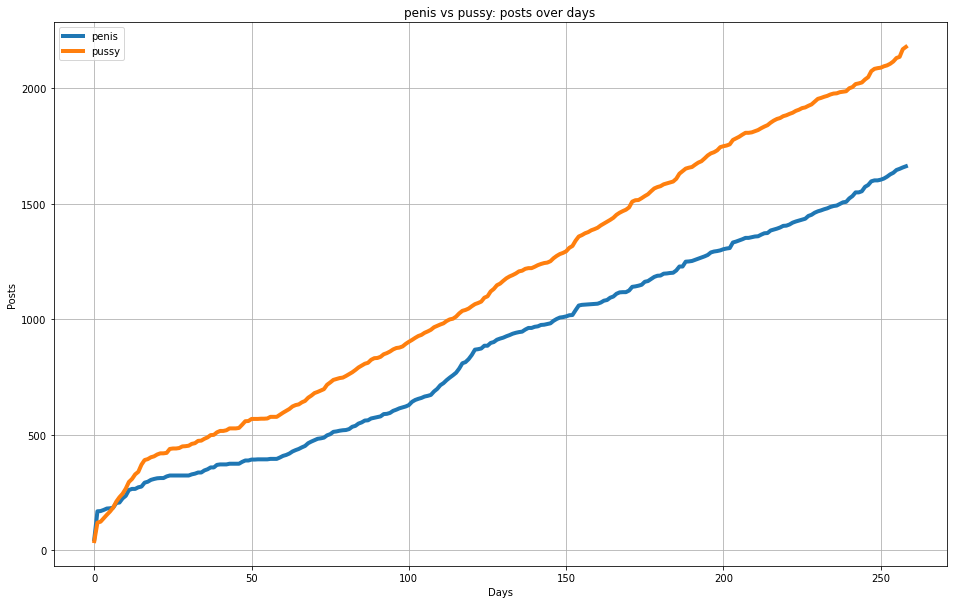

In [137]:
plot_posts_by_days('penis', 'pussy')

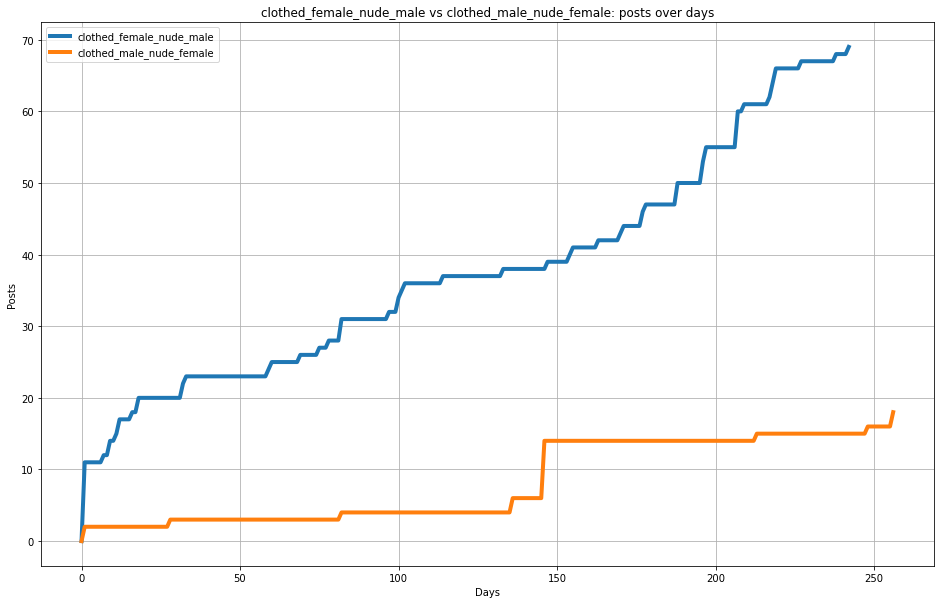

In [138]:
plot_posts_by_days('clothed_female_nude_male', 'clothed_male_nude_female')

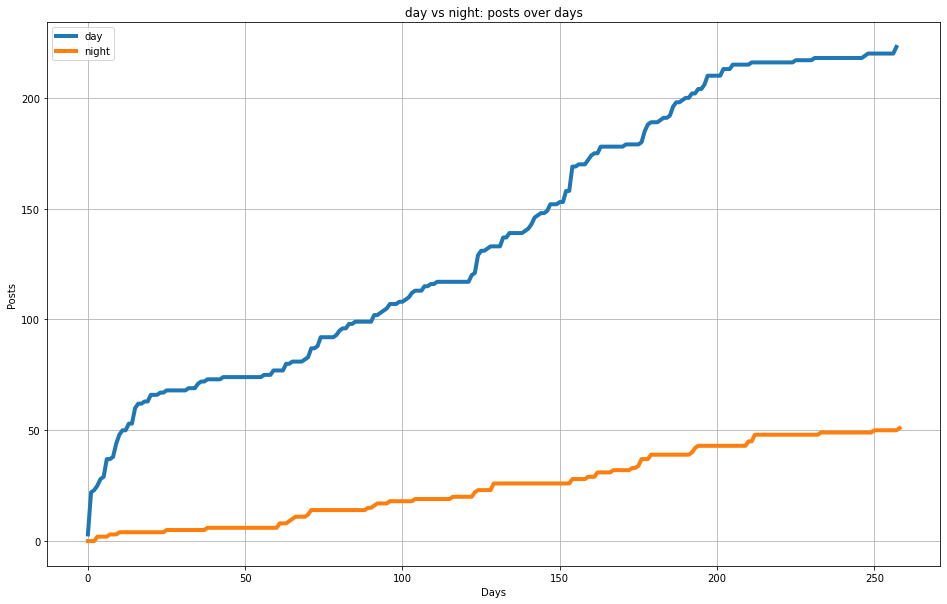

In [139]:
plot_posts_by_days('day', 'night')

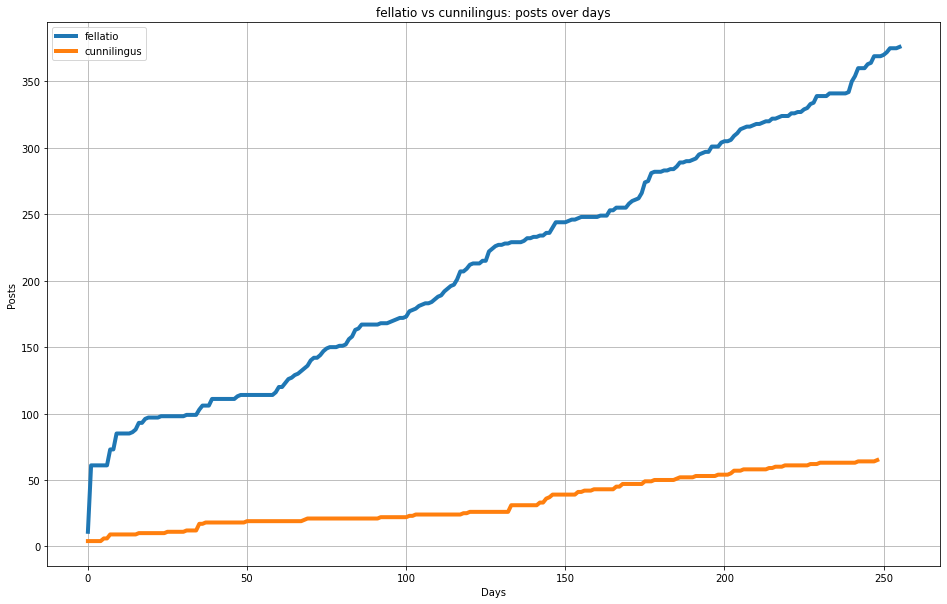

In [141]:
plot_posts_by_days('fellatio', 'cunnilingus')

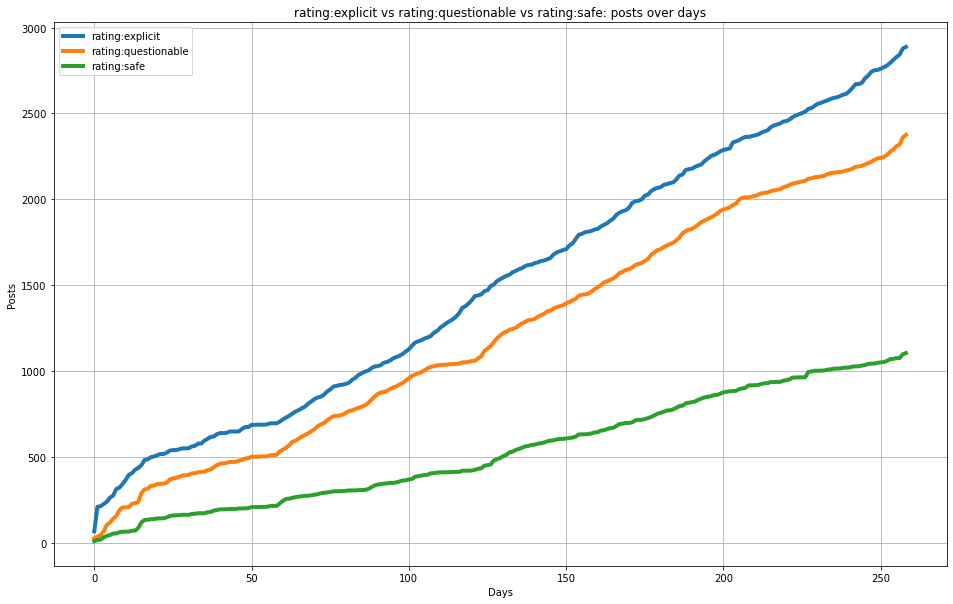

In [142]:
plot_posts_by_days('rating:explicit', 'rating:questionable', 'rating:safe')

In [145]:
overwatch_tags = [i for i in lengths.keys() if 'overwatch' in i]
overwatch_tags = overwatch_tags[:-1]

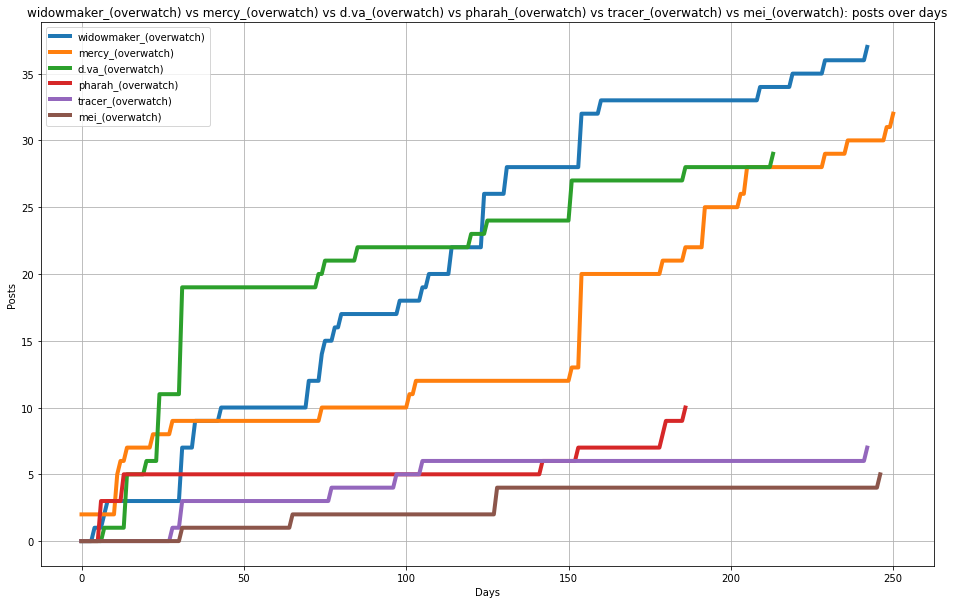

In [147]:
plot_posts_by_days(*overwatch_tags)

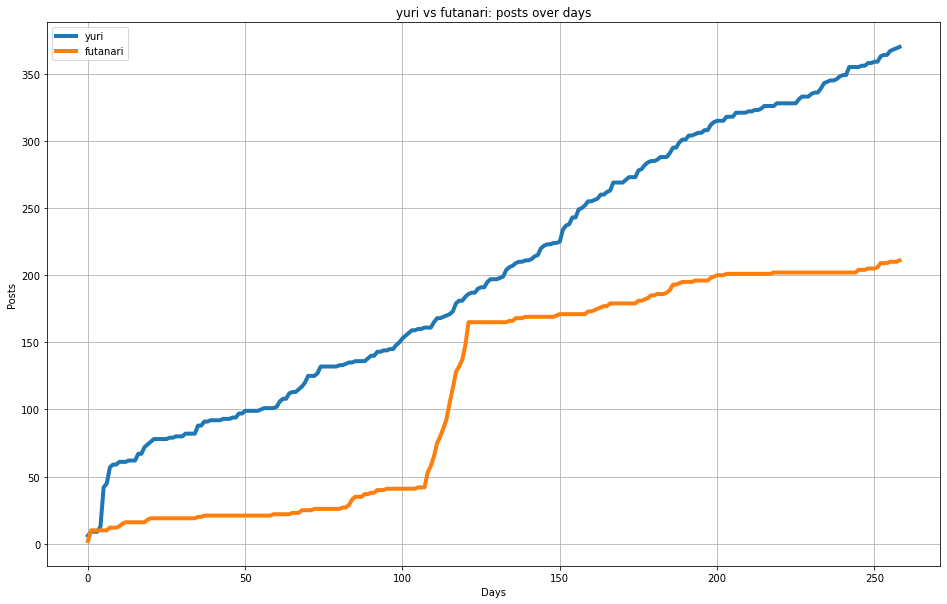

In [219]:
plot_posts_by_days('yuri', 'futanari')

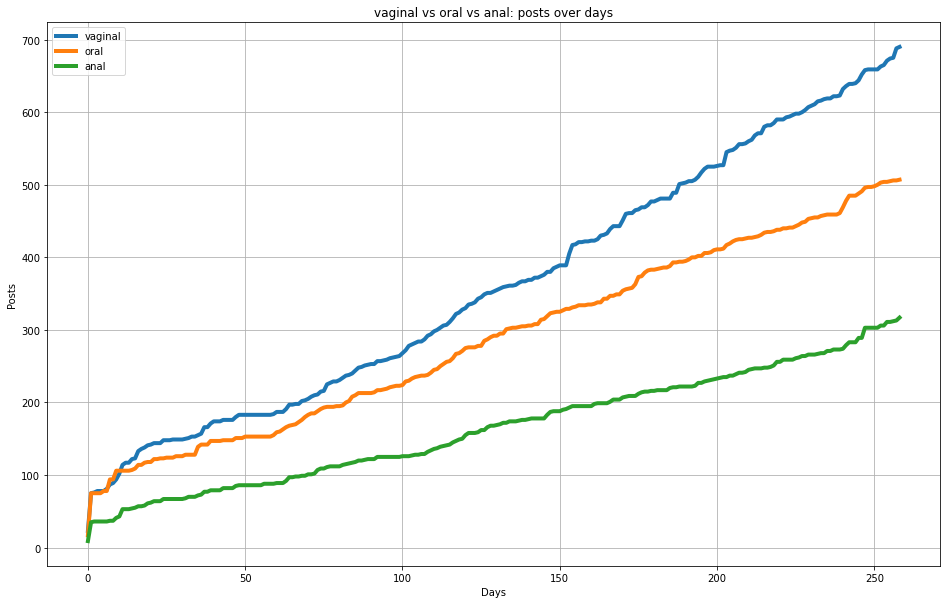

In [223]:
plot_posts_by_days('vaginal', 'oral', 'anal')

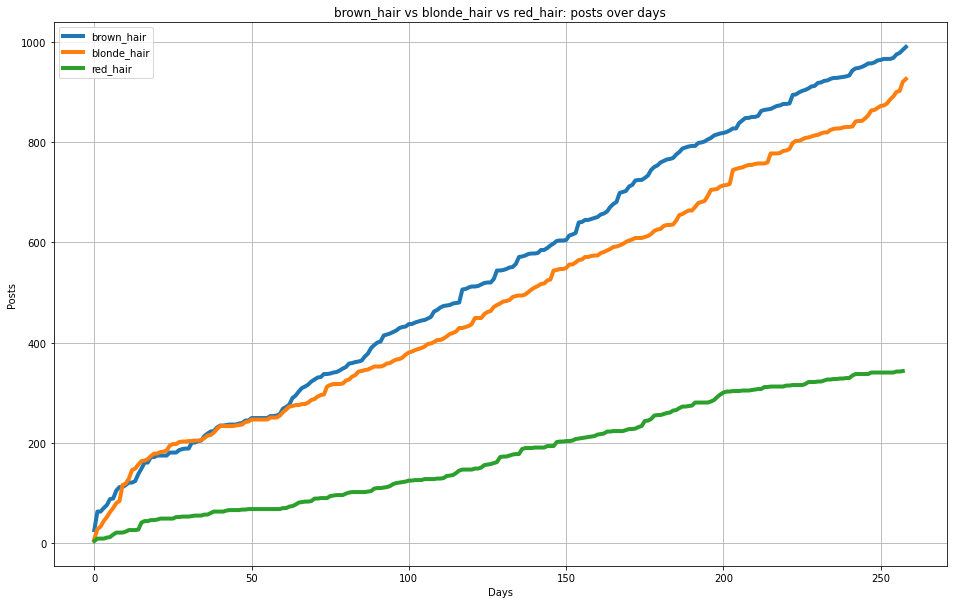

In [227]:
plot_posts_by_days('brown_hair', 'blonde_hair', 'red_hair')